## import dataset and library

In [54]:
import torch 
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
import torch.utils.data
from torch.nn.utils import clip_grad_norm
train_data = torchvision.datasets.MNIST(
    root='./mnist', #保存位置
    train=True, #training set
    transform=torchvision.transforms.ToTensor(), #converts a PIL.Image to torch.FloatTensor(C*H*W) in range(0.0,1.0)
    download=True
)
test_data = torchvision.datasets.MNIST(
    root='./MNIST',
    train=False,
    transform=torchvision.transforms.ToTensor()
)

## increase batch size

In [55]:
from math import ceil
'''adjust learning with epoch:0: {'optimizer': 'SGD', 'lr':  1e-1, 'weight_decay': 1e-4, 'momentum': 0.9},
                        epoch:10: {'lr': 1e-2},
                        epoch:20: {'lr':  1e-3},
                        epoch:30: {'lr':  1e-4}
'''

def increase_batch_size(train_loader, epoch, batchsize):
    if epoch+1 == 60:
        for param_group in optimizer.param_groups:
            param_group['lr'] = 1e-2*(batchsize/128)**0.5
    if epoch+1 == 120:
        for param_group in optimizer.param_groups:
            param_group['lr'] = 1e-3*(batchsize/128)**0.5
    if epoch+1 == 160:
        for param_group in optimizer.param_groups:
            param_group['lr'] = 1e-4*(batchsize/128)**0.5
        
       
 # main function
def traingbm(batchsize):
    torch.manual_seed(123) #reproducible

    EPOCH = 200
    BATCH_SIZE = batchsize
    train_loader = torch.utils.data.DataLoader(dataset=train_data, batch_size=BATCH_SIZE, shuffle=True)
    test_loader = torch.utils.data.DataLoader(test_data, batch_size=BATCH_SIZE,shuffle=False)
    #num_iters = EPOCH*len(train_loader)
    
    loss_data = np.zeros(EPOCH+1)
    test_accu = np.zeros(EPOCH+1)
    # f1 model structure
    class mnist_model(nn.Module):

        def __init__(self):
            super(mnist_model, self).__init__()
            self.layers = nn.Sequential(
                nn.Linear(28 * 28, 512),
                nn.BatchNorm1d(512),
                nn.ReLU(True),
                #nn.Linear(512, 512),
                #nn.BatchNorm1d(512),
                #nn.ReLU(True),
                #nn.Linear(512, 512),
                #nn.BatchNorm1d(512),
                #nn.ReLU(True),
                #nn.Linear(512, 512),
                #nn.BatchNorm1d(512),
                #nn.ReLU(True),
                #nn.Linear(512, 512),
                #nn.BatchNorm1d(512),
                #nn.ReLU(True),
                nn.Linear(512, 10),
            )
        def forward(self, inputs):
            return self.layers(inputs.view(inputs.size(0), -1))
   
    #loss function and opimizer    
    model = mnist_model()
    optimizer = torch.optim.SGD(model.parameters(), weight_decay= 1e-4,lr=(1e-1), momentum=0.9)
    loss_func = nn.CrossEntropyLoss()
    #init_weights = [w.data.cpu().clone() for w in list(model.parameters())]
    mini_batch_size = 128
    #train process
    for epoch in range(EPOCH):
        #increase batchsize during different epoch
        if epoch+1 == 60:
                   train_loader = torch.utils.data.DataLoader(dataset=train_data, batch_size=BATCH_SIZE*5, shuffle=True)
        if epoch+1 == 120:
                   train_loader = torch.utils.data.DataLoader(dataset=train_data, batch_size=BATCH_SIZE*25, shuffle=True)
        if epoch+1 == 160:
                   train_loader = torch.utils.data.DataLoader(dataset=train_data, batch_size=BATCH_SIZE*125, shuffle=True)
        #running_loss = 0.0
        for i, data in enumerate(train_loader,0):
           # get the inputs
            inputs, labels = data

            # wrap them in Variable
            inputs, labels = Variable(inputs), Variable(labels)
           # gbn
            mini_inputs = inputs.chunk(batchsize // mini_batch_size)
            mini_targets = labels.chunk(batchsize // mini_batch_size)


            optimizer.zero_grad()

            for k, mini_input_var in enumerate(mini_inputs):
                mini_target_var = mini_targets[k]
                output = model(mini_input_var)
                loss = loss_func(output, mini_target_var)

                # compute gradient and do SGD step
                loss.backward()

            for p in model.parameters():
                p.grad.data.div_(len(mini_inputs))
            clip_grad_norm(model.parameters(), 5.)     # clip grad avoding grad explosion
            
            optimizer.step()

            if i==0 and epoch==0: 
                print('%d %d loss:%f'%(i+1,epoch+1,loss.data[0]))
                loss_data[i] = loss.data[0]
            if (i+1)%len(train_loader) ==0:
                print('%d %d loss:%f'%(i+1,epoch+1,loss.data[0]))
                loss_data[epoch+1] = loss.data[0]
            
    print('Finished Training')
    np.save('inb_loss 2.npy',loss_data)

In [56]:
import math

batchsize = [128]

for i in range(0,len(batchsize)):
    traingbm(batchsize[i])

1 1 loss:2.383064
469 1 loss:0.087031
469 2 loss:0.091745
469 3 loss:0.031462
469 4 loss:0.042512
469 5 loss:0.031417
469 6 loss:0.023460
469 7 loss:0.032722
469 8 loss:0.120054
469 9 loss:0.020374
469 10 loss:0.012468
469 11 loss:0.007172
469 12 loss:0.009607
469 13 loss:0.026667
469 14 loss:0.043951
469 15 loss:0.007349
469 16 loss:0.049731
469 17 loss:0.067277
469 18 loss:0.019967
469 19 loss:0.011740
469 20 loss:0.017808
469 21 loss:0.007004
469 22 loss:0.004921
469 23 loss:0.013820
469 24 loss:0.012087
469 25 loss:0.009256
469 26 loss:0.017027
469 27 loss:0.006686
469 28 loss:0.008559
469 29 loss:0.010049
469 30 loss:0.040718
469 31 loss:0.014411
469 32 loss:0.009395
469 33 loss:0.013662
469 34 loss:0.006477
469 35 loss:0.021410
469 36 loss:0.039808
469 37 loss:0.015042
469 38 loss:0.008287
469 39 loss:0.017712
469 40 loss:0.002682
469 41 loss:0.014383
469 42 loss:0.032999
469 43 loss:0.011782
469 44 loss:0.003621
469 45 loss:0.007621
469 46 loss:0.014722
469 47 loss:0.015229
469 

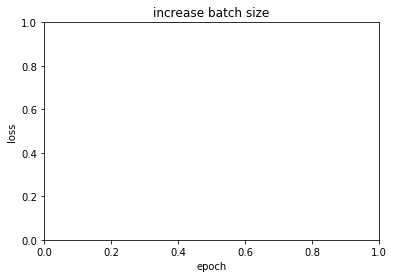

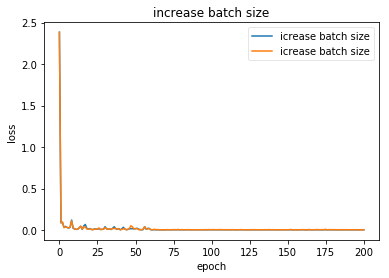

In [72]:
import matplotlib 
from matplotlib.ticker import  MultipleLocator
#matplotlib.use('Agg')
BATCH_SIZE1 = 128
import matplotlib 
from matplotlib.ticker import  MultipleLocator
#matplotlib.use('Agg')
BATCH_SIZE1 = 128
y_inb = np.load('inb_loss 2.npy')
y_dlr = np.load('loss_decay.npy')
yinb1= y_inb[1:len(y_inb)]
ydlr1= y_dlr[1:len(y_dlr)]
x_index=np.arange(0,201,1)
x_index_lr = np.arange(0,200,1)
#x_index4096=np.arange(0,50*15+1,15)

fig = plt.figure()
plt.title("increase batch size")
plt.xlabel('epoch')
plt.ylabel('loss')

plt.plot(x_index,y_inb,label='icrease batch size')
plt.plot(x_index,y_dlr,label='icrease batch size')
#plt.plot(x_index_lr,y_decay,label='decay learning rate')
#plt.plot(x_index4096,distance_lr_4096,label='Batch_size:4096')
#plt.axis([-0.1,4,0.0,1.0]) 

#plt.fill_between(x_index,X1,X3,color = 'red',alpha = '0.1')
plt.legend(loc='upper right',framealpha = 0.5)
plt.savefig("increase batch size 4.jpg") 
plt.show()

## decay learning rate

In [67]:
def increase_batch_size(train_loader, epoch, batchsize):
    if epoch+1 == 60:
        for param_group in optimizer.param_groups:
            param_group['lr'] = 1e-2*(batchsize/128)**0.5
    if epoch+1 == 120:
        for param_group in optimizer.param_groups:
            param_group['lr'] = 1e-3*(batchsize/128)**0.5
    if epoch+1 == 160:
        for param_group in optimizer.param_groups:
            param_group['lr'] = 1e-4*(batchsize/128)**0.5
        
       
 # main function
def traingbm_decay(batchsize):
    torch.manual_seed(123) #reproducible

    EPOCH = 200
    BATCH_SIZE = batchsize
    train_loader = torch.utils.data.DataLoader(dataset=train_data, batch_size=BATCH_SIZE, shuffle=True)
    test_loader = torch.utils.data.DataLoader(test_data, batch_size=BATCH_SIZE,shuffle=False)
    num_iters = EPOCH*len(train_loader)
    loss_decay = np.zeros(EPOCH+1)

    # f1 model structure
    class mnist_model(nn.Module):

        def __init__(self):
            super(mnist_model, self).__init__()
            self.layers = nn.Sequential(
                nn.Linear(28 * 28, 512),
                nn.BatchNorm1d(512),
                nn.ReLU(True),
                #nn.Linear(512, 512),
                #nn.BatchNorm1d(512),
                #nn.ReLU(True),
                #nn.Linear(512, 512),
                #nn.BatchNorm1d(512),
                #nn.ReLU(True),
                #nn.Linear(512, 512),
                #nn.BatchNorm1d(512),
                #nn.ReLU(True),
                #nn.Linear(512, 512),
                #nn.BatchNorm1d(512),
                #nn.ReLU(True),
                nn.Linear(512, 10),
            )
        def forward(self, inputs):
            return self.layers(inputs.view(inputs.size(0), -1))
   
    #loss function and opimizer    
    model = mnist_model()
    optimizer = torch.optim.SGD(model.parameters(), lr=(1e-1),weight_decay= 1e-4, momentum=0.9)
    loss_func = nn.CrossEntropyLoss()
    #init_weights = [w.data.cpu().clone() for w in list(model.parameters())]
    mini_batch_size = 128
    #train process
    for epoch in range(EPOCH):
    
        #decay learning rate during different epoch
        if epoch+1 == 60:
                  for param_group in optimizer.param_groups:
                            param_group['lr'] = 1e-1/5
        if epoch+1 == 120:
                    for param_group in optimizer.param_groups:
                            param_group['lr'] = 1e-1/25
        if epoch+1 == 160:
                    for param_group in optimizer.param_groups:
                            param_group['lr'] = 1e-1/125
        #running_loss = 0.0
        for i, data in enumerate(train_loader,0):
           # get the inputs
            inputs, labels = data

            # wrap them in Variable
            inputs, labels = Variable(inputs), Variable(labels)
           # gbn
            mini_inputs = inputs.chunk(batchsize // mini_batch_size)
            mini_targets = labels.chunk(batchsize // mini_batch_size)


            optimizer.zero_grad()

            for k, mini_input_var in enumerate(mini_inputs):
                mini_target_var = mini_targets[k]
                output = model(mini_input_var)
                loss = loss_func(output, mini_target_var)

                # compute gradient and do SGD step
                loss.backward()

            for p in model.parameters():
                p.grad.data.div_(len(mini_inputs))
            clip_grad_norm(model.parameters(), 5.)     # clip grad avoding grad explosion
            
            optimizer.step()

            if i==0 and epoch==0: 
                loss_decay[i] = loss.data[0]
                print('%d %d step_dist:%f'%(i+1,epoch+1,loss_decay[i]))
               
            if (i+1)%len(train_loader) ==0:
                loss_decay[epoch+1] = loss.data[0]              
                print('%d %d step_dist:%f'%(i+1,epoch+1,loss_decay[epoch+1]))
                
            
    print('Finished Training')
    np.save('loss_decay.npy',loss_decay)

In [68]:
import math

batchsize = [128]

for i in range(0,len(batchsize)):
    traingbm_decay(batchsize[i])

1 1 step_dist:2.383064
469 1 step_dist:0.087096
469 2 step_dist:0.096759
469 3 step_dist:0.029085
469 4 step_dist:0.037022
469 5 step_dist:0.032793
469 6 step_dist:0.024605
469 7 step_dist:0.035877
469 8 step_dist:0.111924
469 9 step_dist:0.029200
469 10 step_dist:0.011315
469 11 step_dist:0.008825
469 12 step_dist:0.010323
469 13 step_dist:0.025540
469 14 step_dist:0.048236
469 15 step_dist:0.009692
469 16 step_dist:0.038191
469 17 step_dist:0.033278
469 18 step_dist:0.013446
469 19 step_dist:0.007813
469 20 step_dist:0.014455
469 21 step_dist:0.007814
469 22 step_dist:0.004216
469 23 step_dist:0.011353
469 24 step_dist:0.008411
469 25 step_dist:0.012308
469 26 step_dist:0.025478
469 27 step_dist:0.005979
469 28 step_dist:0.008164
469 29 step_dist:0.008913
469 30 step_dist:0.030407
469 31 step_dist:0.013168
469 32 step_dist:0.010614
469 33 step_dist:0.013464
469 34 step_dist:0.006404
469 35 step_dist:0.018824
469 36 step_dist:0.017230
469 37 step_dist:0.020382
469 38 step_dist:0.01180

In [34]:
y_dlr = np.load('loss_decay.npy')
y_inb = np.load('inb_loss.npy')

In [40]:
yinb1 = y_inb[1:len(y_inb)]
ydlr1 = y_dlr[1:len(y_dlr)]

In [41]:
len(ydlr1)

200

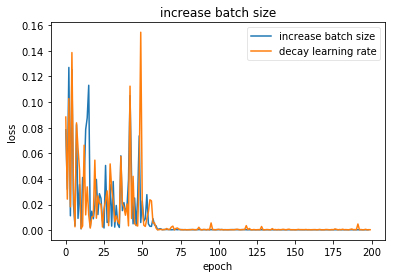

In [44]:
import matplotlib 
from matplotlib.ticker import  MultipleLocator
#matplotlib.use('Agg')
BATCH_SIZE1 = 128

x_index=np.arange(0,199,1)
x_index_lr = np.arange(0,200,1)
#x_index4096=np.arange(0,50*15+1,15)

fig = plt.figure()
plt.title("increase batch size")
plt.xlabel('epoch')
plt.ylabel('loss')

plt.plot(x_index,yinb1,label='increase batch size')
plt.plot(x_index_lr,ydlr1,label='decay learning rate')
#plt.plot(x_index4096,distance_lr_4096,label='Batch_size:4096')
#plt.axis([-0.1,4,0.0,1.0]) 

#plt.fill_between(x_index,X1,X3,color = 'red',alpha = '0.1')
plt.legend(loc='upper right',framealpha = 0.5)
plt.savefig("increase batch size 2.jpg") 
plt.show()